In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [5]:
#normalize the data 
x_train, x_test = x_train /255.0, x_test/255.0

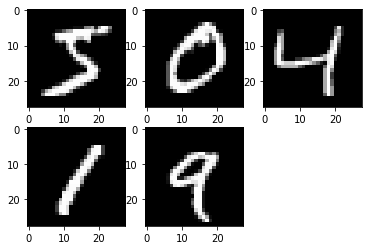

In [23]:
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [27]:
#model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =(28,28)), 
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#another way to build model
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(128, activation ='relu'))
model1.add(keras.layers.Dense(10))
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
#must set logits = True so model can train better because we dit not use Softmax at the end of the model
optim = keras.optimizers.Adam(lr=0.001)
metrics = ['accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [30]:
#training
batch_size = 64
epochs =5

In [31]:
model.fit(x_train, y_train, batch_size, epochs=epochs,shuffle= True, verbose=2 )

Epoch 1/5
938/938 - 4s - loss: 0.3002 - accuracy: 0.9157 - 4s/epoch - 4ms/step
Epoch 2/5
938/938 - 4s - loss: 0.1320 - accuracy: 0.9620 - 4s/epoch - 4ms/step
Epoch 3/5
938/938 - 3s - loss: 0.0928 - accuracy: 0.9732 - 3s/epoch - 4ms/step
Epoch 4/5
938/938 - 4s - loss: 0.0697 - accuracy: 0.9794 - 4s/epoch - 4ms/step
Epoch 5/5
938/938 - 4s - loss: 0.0571 - accuracy: 0.9826 - 4s/epoch - 4ms/step


In [32]:
# evaluate model
model.evaluate(x_test, y_test, batch_size= batch_size, verbose=2)

157/157 - 0s - loss: 0.0741 - accuracy: 0.9777 - 489ms/epoch - 3ms/step


[0.0741085410118103, 0.9776999950408936]

In [33]:
#predictions: need softmax layer as probability 
#option 1: add softmax layer to existing model as the last layer
probability_model = keras.models.Sequential([
    model, 
    keras.layers.Softmax()
])
predictions = probability_model(x_test)
predict0 = predictions[0]
print(predict0)
#must assign a lable for this prediction, get the max probability out of the label
label0= np.argmax(predict0) 
print(label0)

tf.Tensor(
[1.3017359e-06 1.3151052e-09 2.0457112e-05 1.0518596e-03 1.6089872e-10
 2.4697718e-07 3.2766085e-11 9.9891835e-01 2.3646862e-06 5.3672056e-06], shape=(10,), dtype=float32)
7


In [34]:
# prediction
#option 2: model + softmax separately
prediction = model(x_test)
prediction = tf.nn.softmax(prediction)
predict0 = prediction[0]
print(predict0)
label0= np.argmax(predict0) 
print(label0)

tf.Tensor(
[1.3017359e-06 1.3151052e-09 2.0457112e-05 1.0518596e-03 1.6089872e-10
 2.4697718e-07 3.2766085e-11 9.9891835e-01 2.3646862e-06 5.3672056e-06], shape=(10,), dtype=float32)
7


In [35]:
#option 3
prediction3= model.predict(x_test, batch_size= batch_size)
prediction3 = tf.nn.softmax(prediction3)
predict0 = prediction3[0]
print(predict0)
label0= np.argmax(predict0) 
print(label0)

157/157 [==============================] - 0s 2ms/step
tf.Tensor(
[1.3017359e-06 1.3151052e-09 2.0457112e-05 1.0518596e-03 1.6089872e-10
 2.4697718e-07 3.2766085e-11 9.9891835e-01 2.3646862e-06 5.3672056e-06], shape=(10,), dtype=float32)
7


In [36]:
# predict 5 numbers
predict05 = predictions[0:5]
print(predict05.shape)
label05 = np.argmax(predict05, axis =1)
print(label05)

(5, 10)
[7 2 1 0 4]


In [38]:
model_out = keras.Model(inputs=model.input,
                                       outputs=model.get_layer('dense_3').output)
model_out = model_out(x_train)

In [39]:
print(model_out[0])

tf.Tensor(
[ -6.2729535  -7.110255   -2.5226789   8.6701765 -22.92956    12.186588
 -13.188359   -2.1235926  -5.4858823  -2.1635897], shape=(10,), dtype=float32)


In [40]:
print(y_train[0])

5
